<a href="https://colab.research.google.com/github/abhishekangne7/EV/blob/main/SSE_ABHISHEK_ANGNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
cork_ev_chargers = pd.read_csv('/content/drive/MyDrive/SSE/Cork_EV_chargers.csv')
south_dublin_ev_chargers = pd.read_csv('/content/drive/MyDrive/SSE/SouthDublin_EV_chargers.csv')
fingal_ev_chargers = pd.read_csv('/content/drive/MyDrive/SSE/FingalCounty_EV_chargers.csv')
population_irl = pd.read_csv('/content/drive/MyDrive/SSE/Population_IRL.csv')
ev_ownership_sex = pd.read_csv('/content/drive/MyDrive/SSE/EV_Ownership.csv')
ev_ownership_county = pd.read_csv('/content/drive/MyDrive/SSE/EV_ownership_county.csv')

In [91]:
# Add a new column 'county' and populate with appropriate values
cork_ev_chargers['county'] = 'Cork'
fingal_ev_chargers['county'] = 'Dublin'
south_dublin_ev_chargers['county'] = 'Dublin'

In [92]:
# Inspect column names for each dataset
print(cork_ev_chargers.columns)
print(fingal_ev_chargers.columns)
print(south_dublin_ev_chargers.columns)


Index(['OBJECTID', 'Name', 'Details', 'Longitude', 'Latitude', 'Type',
       'county'],
      dtype='object')
Index(['X', 'Y', 'Location', 'Address', 'EV_Charging__', 'Lat', 'Long',
       'ObjectId', 'county'],
      dtype='object')
Index(['LEA', 'Location', 'Operator', 'Number_of_chargers', 'Type', 'Rating',
       'ObjectId', 'county'],
      dtype='object')


In [93]:
# Standardize column names for consistency
cork_ev_chargers.columns = cork_ev_chargers.columns.str.lower().str.replace(' ', '_')
fingal_ev_chargers.columns = fingal_ev_chargers.columns.str.lower().str.replace(' ', '_')
south_dublin_ev_chargers.columns = south_dublin_ev_chargers.columns.str.lower().str.replace(' ', '_')

# Combine longitude and latitude columns, ensuring they exist
if 'long' in cork_ev_chargers.columns and 'lat' in cork_ev_chargers.columns:
    cork_ev_chargers['longitude'] = cork_ev_chargers['long']
    cork_ev_chargers['latitude'] = cork_ev_chargers['lat']
elif 'longitude' in cork_ev_chargers.columns and 'latitude' in cork_ev_chargers.columns:
    cork_ev_chargers['longitude'] = cork_ev_chargers['longitude']
    cork_ev_chargers['latitude'] = cork_ev_chargers['latitude']

if 'long' in fingal_ev_chargers.columns and 'lat' in fingal_ev_chargers.columns:
    fingal_ev_chargers['longitude'] = fingal_ev_chargers['long']
    fingal_ev_chargers['latitude'] = fingal_ev_chargers['lat']
elif 'longitude' in fingal_ev_chargers.columns and 'latitude' in fingal_ev_chargers.columns:
    fingal_ev_chargers['longitude'] = fingal_ev_chargers['longitude']
    fingal_ev_chargers['latitude'] = fingal_ev_chargers['latitude']

if 'long' in south_dublin_ev_chargers.columns and 'lat' in south_dublin_ev_chargers.columns:
    south_dublin_ev_chargers['longitude'] = south_dublin_ev_chargers['long']
    south_dublin_ev_chargers['latitude'] = south_dublin_ev_chargers['lat']
elif 'longitude' in south_dublin_ev_chargers.columns and 'latitude' in south_dublin_ev_chargers.columns:
    south_dublin_ev_chargers['longitude'] = south_dublin_ev_chargers['longitude']
    south_dublin_ev_chargers['latitude'] = south_dublin_ev_chargers['latitude']

# Drop redundant columns
cork_ev_chargers.drop(columns=['long', 'lat', 'x', 'y'], inplace=True, errors='ignore')
fingal_ev_chargers.drop(columns=['long', 'lat', 'x', 'y'], inplace=True, errors='ignore')
south_dublin_ev_chargers.drop(columns=['long', 'lat', 'x', 'y'], inplace=True, errors='ignore')

# Verify the modified datasets
print(cork_ev_chargers.columns)
print(fingal_ev_chargers.columns)
print(south_dublin_ev_chargers.columns)

Index(['objectid', 'name', 'details', 'longitude', 'latitude', 'type',
       'county'],
      dtype='object')
Index(['location', 'address', 'ev_charging__', 'objectid', 'county',
       'longitude', 'latitude'],
      dtype='object')
Index(['lea', 'location', 'operator', 'number_of_chargers', 'type', 'rating',
       'objectid', 'county'],
      dtype='object')


In [94]:
#Some more cleaning and transformation

# Drop the columns that we are not using for our analysis
cork_ev_chargers.drop(columns=['objectid'], inplace=True)

# Extract charger count from 'details' and rename it to 'number_of_chargers'
def extract_chargers(details):
    if "x2" in details or "2 cars" in details:
        return 2
    else:
        return 1

cork_ev_chargers['number_of_chargers'] = cork_ev_chargers['details'].apply(extract_chargers)

# Display the transformed DataFrame
print(cork_ev_chargers.head(20))

cork_ev_chargers.info()


                                                 name  \
0                                 Copley Street, Cork   
1   Copley Street, Opposite Keohans Funeral Home, ...   
2                         95 Glanmire Road, Cork City   
3                   South Mall (opp no 41), Cork City   
4    Black Ash Park & Ride, Off South Link Road, Cork   
5                        Cork Institute of Technology   
6                                    Cork County Hall   
7                                        Kent Station   
8                   Paul Street Multi Storey Car Park   
9             North Main Street Multi Storey Car Park   
10            City Hall Q-park Multi Storey Car Park    
11         Grand Parade Q-park Multi Storey Car Park    
12        St. Finbarr’s Q-park Multi Storey Car Park    
13      Carrolls’s Quay Q-park Multi Storey Car Park    
14                     Musgrave Group HQ, Ballycureen   
15       Deasey’s Topaz Service Station, Commons Road   
16                      Esso/Ce

In [95]:
#The Fingal_ev_chargers.csv is the next one we will look at
print(fingal_ev_chargers.head(2))

# Drop the columns that are no longer needed
fingal_ev_chargers.drop(columns=['objectid'], inplace=True)
print(fingal_ev_chargers.head(2))

# Rename the ev_charging__ column to chargers to maintain consistency
fingal_ev_chargers.rename(columns={'ev_charging__': 'number_of_chargers'}, inplace=True)

print(fingal_ev_chargers.head(2))

                 location                             address  ev_charging__  \
0  Malahide Train Station  Station Road, Malahide, Co  Dublin              1   
1  Malahihe Garda Station  1 - 2 Saint James Terrace Malahide              1   

   objectid  county  longitude   latitude  
0         1  Dublin  -6.160727  53.444902  
1         2  Dublin  -6.152040  53.451086  
                 location                             address  ev_charging__  \
0  Malahide Train Station  Station Road, Malahide, Co  Dublin              1   
1  Malahihe Garda Station  1 - 2 Saint James Terrace Malahide              1   

   county  longitude   latitude  
0  Dublin  -6.160727  53.444902  
1  Dublin  -6.152040  53.451086  
                 location                             address  \
0  Malahide Train Station  Station Road, Malahide, Co  Dublin   
1  Malahihe Garda Station  1 - 2 Saint James Terrace Malahide   

   number_of_chargers  county  longitude   latitude  
0                   1  Dublin  -6.

In [96]:
#south_dublin_ev_chargers

south_dublin_ev_chargers.head()

# Merge 'lea' and 'location' into one column named 'location'
south_dublin_ev_chargers['location'] = south_dublin_ev_chargers['lea'] + ', ' + south_dublin_ev_chargers['location']

# Display the updated DataFrame
print(south_dublin_ev_chargers)

# Drop the 'lea' and other columns that are no longer needed
south_dublin_ev_chargers.drop(columns=['operator', 'objectid','rating','lea'], inplace=True)

# Display the updated DataFrame

print(south_dublin_ev_chargers.head())

                        lea  \
0                Clondalkin   
1                Clondalkin   
2                Clondalkin   
3                Clondalkin   
4                Clondalkin   
5                Clondalkin   
6                     Lucan   
7                     Lucan   
8                     Lucan   
9                     Lucan   
10                    Lucan   
11               Clondalkin   
12               Clondalkin   
13               Clondalkin   
14     Palmerstown Fonthill   
15     Palmerstown Fonthill   
16   Rathfarnham_Templeogue   
17   Rathfarnham_Templeogue   
18   Rathfarnham_Templeogue   
19         Tallaght Central   
20         Tallaght Central   
21         Tallaght Central   
22           Tallaght South   
23           Tallaght South   
24                 Jobstown   
25  Rathfarnham -Templeogue   
26  Rathfarnham -Templeogue   
27  Rathfarnham -Templeogue   
28  Rathfarnham -Templeogue   
29  Rathfarnham -Templeogue   
30  Rathfarnham -Templeogue   
31   Fir

In [97]:
# Combine datasets
ev_chargers_combined = pd.concat([cork_ev_chargers, fingal_ev_chargers, south_dublin_ev_chargers], ignore_index=True)

# Verify the combined dataset
print(ev_chargers_combined.columns)
print(ev_chargers_combined[['county', 'location', 'longitude', 'latitude']].head())


Index(['name', 'details', 'longitude', 'latitude', 'type', 'county',
       'number_of_chargers', 'location', 'address'],
      dtype='object')
  county location  longitude   latitude
0   Cork      NaN  -8.467683  51.895178
1   Cork      NaN  -8.467683  51.895178
2   Cork      NaN  -8.456496  51.902475
3   Cork      NaN  -8.473353  51.896344
4   Cork      NaN  -8.466503  51.878588


In [98]:
# Group and summarize combined EV charger data by location and type
ev_chargers_summary = ev_chargers_combined.groupby(['county', 'location', 'type', 'longitude', 'latitude']).agg({
    'number_of_chargers': 'sum'
}).reset_index()

# Identify locations with limited charging infrastructure
limited_infrastructure = ev_chargers_summary[ev_chargers_summary['number_of_chargers'] < 2]

# Verify limited infrastructure dataset
print(limited_infrastructure[['county', 'location', 'longitude', 'latitude', 'number_of_chargers']])


Empty DataFrame
Columns: [county, location, longitude, latitude, number_of_chargers]
Index: []


In [99]:
# Combine longitude and latitude columns, ensuring they exist
def combine_lat_long(df):
    if 'long' in df.columns and 'lat' in df.columns:
        df['longitude'] = df['long']
        df['latitude'] = df['lat']
    elif 'longitude' in df.columns and 'latitude' in df.columns:
        df['longitude'] = df['longitude']
        df['latitude'] = df['latitude']
    return df

# Apply the function to each dataset
cork_ev_chargers = combine_lat_long(cork_ev_chargers)
fingal_ev_chargers = combine_lat_long(fingal_ev_chargers)
south_dublin_ev_chargers = combine_lat_long(south_dublin_ev_chargers)

# Drop redundant columns
cork_ev_chargers.drop(columns=['long', 'lat', 'x', 'y'], inplace=True, errors='ignore')
fingal_ev_chargers.drop(columns=['long', 'lat', 'x', 'y'], inplace=True, errors='ignore')
south_dublin_ev_chargers.drop(columns=['long', 'lat', 'x', 'y'], inplace=True, errors='ignore')

# Combine datasets
ev_chargers_combined = pd.concat([cork_ev_chargers, fingal_ev_chargers, south_dublin_ev_chargers], ignore_index=True)

# Group and summarize combined EV charger data by location and type
ev_chargers_summary = ev_chargers_combined.groupby(['county', 'location', 'type', 'longitude', 'latitude']).agg({
    'number_of_chargers': 'sum'
}).reset_index()

# Identify locations with limited charging infrastructure
limited_infrastructure = ev_chargers_summary[ev_chargers_summary['number_of_chargers'] < 2]

# Return the locations with need for additional EV chargers
limited_infrastructure_locations = limited_infrastructure[['county', 'location', 'longitude', 'latitude']]
limited_infrastructure_locations


,county,location,longitude,latitude


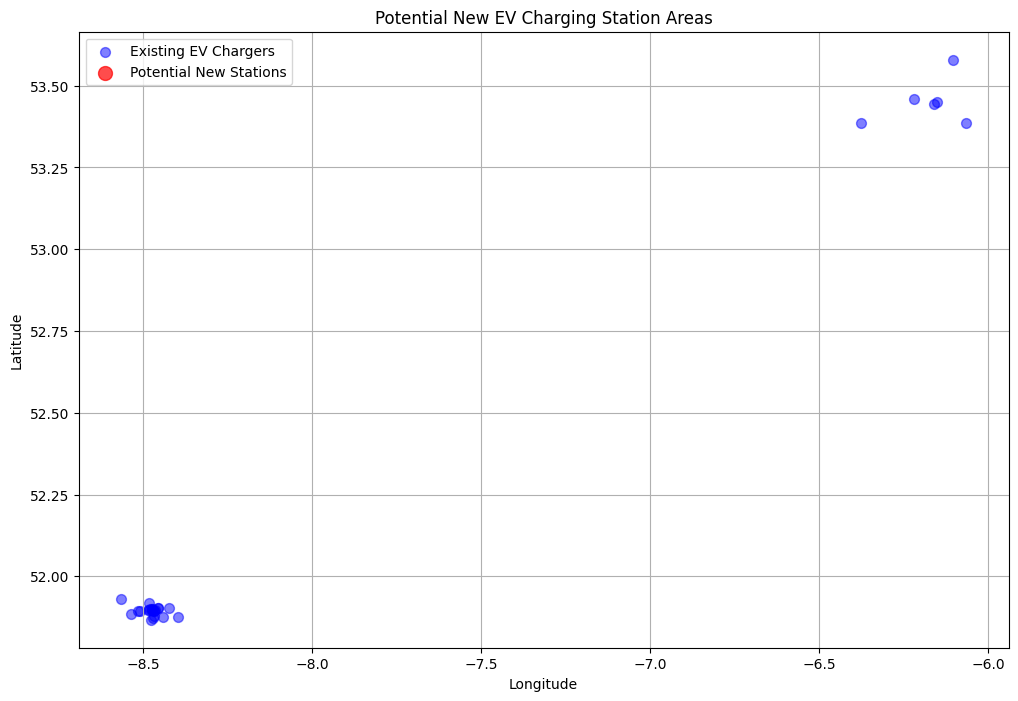

In [100]:
import matplotlib.pyplot as plt

# Plot the existing EV chargers
plt.figure(figsize=(12, 8))

# Plot existing EV chargers
plt.scatter(ev_chargers_combined['longitude'], ev_chargers_combined['latitude'],
            c='blue', alpha=0.5, s=50, label='Existing EV Chargers')

# Highlight potential new charging stations (limited infrastructure)
plt.scatter(limited_infrastructure['longitude'], limited_infrastructure['latitude'],
            c='red', alpha=0.7, s=100, label='Potential New Stations')

# Customize the plot
plt.title('Potential New EV Charging Station Areas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()


In [181]:
population_irl = pd.read_csv('/content/drive/MyDrive/SSE/Population_IRL.csv')
ev_ownership_sex = pd.read_csv('/content/drive/MyDrive/SSE/EV_Ownership.csv')
ev_ownership_county = pd.read_csv('/content/drive/MyDrive/SSE/EV_ownership_county.csv')

# Standardize column names
ev_ownership_county.columns = ev_ownership_county.columns.str.lower().str.replace(' ', '_')
ev_ownership_sex.columns = ev_ownership_sex.columns.str.lower().str.replace(' ', '_')
population_irl.columns = population_irl.columns.str.lower().str.replace(' ', '_')

# Rename tlist(a1) to year for clarity
ev_ownership_county.rename(columns={'tlist(a1)': 'year'}, inplace=True)

# Check for and remove duplicates in EV ownership data
ev_ownership_county = ev_ownership_county.drop_duplicates()

# Check for and remove duplicates in EV ownership data
ev_ownership_sex = ev_ownership_sex.drop_duplicates()



In [182]:
ev_ownership_sex.head(3)

,statistic_label,year,sex,age_group,unit,value
0,Owns an Electric Vehicle (EV),2021,Male,18 - 29 years,%,1.2
1,Owns an Electric Vehicle (EV),2021,Male,30 - 44 years,%,4.1
2,Owns an Electric Vehicle (EV),2021,Male,45 - 59 years,%,4.5


In [183]:
ev_ownership_county.head(3)

,statistic,statistic_label,year,year,c03657v04399,region,unit,value
0,NTA44C01,Owns an Electric Vehicle (EV),2019,2019,10,State,%,1.5
1,NTA44C01,Owns an Electric Vehicle (EV),2019,2019,20,Dublin,%,1.6
2,NTA44C01,Owns an Electric Vehicle (EV),2019,2019,30,All regions excluding Dublin,%,1.4


In [184]:
population_irl.head()

,statistic_label,censusyear,county,sex,unit,value
0,Population at Each Census,1841,State,Both sexes,Number,6528799
1,Population at Each Census,1841,State,Male,Number,3222485
2,Population at Each Census,1841,State,Female,Number,3306314
3,Population at Each Census,1841,Carlow,Both sexes,Number,86228
4,Population at Each Census,1841,Carlow,Male,Number,42428


In [185]:
# Filter the DataFrame and create a copy to avoid SettingWithCopyWarning
population_irl = population_irl[population_irl['censusyear'] == 2022].copy()

#Drop unnecessary columns
population_irl.drop(columns=['unit', 'statistic_label', 'censusyear'], inplace=True)

#Rename the 'value' column to 'population'
population_irl.rename(columns={'value': 'population'}, inplace=True)

population_irl.head(2)

,county,sex,population
2025,State,Both sexes,5149139
2026,State,Male,2544549


In [186]:
def ev_ownership_question(ev_ownership):
    ev_ownership['statistic_label'] = ev_ownership['statistic_label'].apply(
        lambda x: '1' if x == 'Owns an Electric Vehicle (EV)' else '0' if x == 'Does not own an Electric Vehicle (EV)' else x
    )
    return ev_ownership

In [187]:
ev_ownership_county = ev_ownership_question(ev_ownership_county)

In [188]:
ev_ownership_sex = ev_ownership_question(ev_ownership_sex)

In [189]:
ev_ownership_county.head(3)

,statistic,statistic_label,year,year,c03657v04399,region,unit,value
0,NTA44C01,1,2019,2019,10,State,%,1.5
1,NTA44C01,1,2019,2019,20,Dublin,%,1.6
2,NTA44C01,1,2019,2019,30,All regions excluding Dublin,%,1.4


In [190]:
ev_ownership_sex.head(3)

,statistic_label,year,sex,age_group,unit,value
0,1,2021,Male,18 - 29 years,%,1.2
1,1,2021,Male,30 - 44 years,%,4.1
2,1,2021,Male,45 - 59 years,%,4.5


In [191]:
# Rename the column to appropriate names
ev_ownership_sex.rename(columns={'statistic_label': 'owns_an_ev', 'value': 'percent_ownership'}, inplace=True)

# Drop the columns that are no longer needed
ev_ownership_sex.drop(columns=['unit'], inplace=True)

ev_ownership_sex.head(2)


,owns_an_ev,year,sex,age_group,percent_ownership
0,1,2021,Male,18 - 29 years,1.2
1,1,2021,Male,30 - 44 years,4.1


In [192]:
# Rename the column to appropriate names
ev_ownership_county.rename(columns={'statistic_label': 'owns_an_ev', 'value': 'percent_ownership', 'region': 'county'}, inplace=True)

# Drop the columns that are no longer needed
ev_ownership_county.drop(columns=['unit','statistic','c03657v04399'], inplace=True)

ev_ownership_county.head(2)

,owns_an_ev,year,year,county,percent_ownership
0,1,2019,2019,State,1.5
1,1,2019,2019,Dublin,1.6


In [194]:
# Remove duplicate 'year' column in ev_ownership_county
ev_ownership_county = ev_ownership_county.loc[:, ~ev_ownership_county.columns.duplicated()]

# Merging the ev_ownership dataframes
ev_ownership_merged = pd.merge(
    ev_ownership_sex,
    ev_ownership_county,
    on=['owns_an_ev', 'year'],
    suffixes=('_individual', '_county')
)

# Display the merged DataFrame
ev_ownership_merged.head(10)

,owns_an_ev,year,sex,age_group,percent_ownership_individual,county,percent_ownership_county
0,1,2021,Male,18 - 29 years,1.2,State,3.2
1,1,2021,Male,18 - 29 years,1.2,Dublin,4.9
2,1,2021,Male,18 - 29 years,1.2,All regions excluding Dublin,2.5
3,1,2021,Male,30 - 44 years,4.1,State,3.2
4,1,2021,Male,30 - 44 years,4.1,Dublin,4.9
5,1,2021,Male,30 - 44 years,4.1,All regions excluding Dublin,2.5
6,1,2021,Male,45 - 59 years,4.5,State,3.2
7,1,2021,Male,45 - 59 years,4.5,Dublin,4.9
8,1,2021,Male,45 - 59 years,4.5,All regions excluding Dublin,2.5
9,1,2021,Male,60 - 74 years,4.9,State,3.2


In [196]:
# Create fact table for EV chargers
fact_ev_chargers = ev_chargers_combined[['location', 'number_of_chargers', 'county']]

In [197]:
# Create dimension table for EV ownership and add county column
dim_ev_ownership = ev_ownership_merged.copy()

In [198]:
# Aggregate ownership data by county
ev_ownership_aggregated = dim_ev_ownership.groupby(['county','sex','age_group','owns_an_ev'])['percent_ownership_individual'].mean().reset_index()


In [199]:
ev_ownership_aggregated.rename(columns={'percent_ownership_individual': 'percent_ownership_county'}, inplace=True)

In [203]:
ev_ownership_aggregated.head(100)

,county,sex,age_group,owns_an_ev,percent_ownership_county
0,All regions excluding Dublin,Female,18 - 29 years,0,98.2
1,All regions excluding Dublin,Female,18 - 29 years,1,1.8
2,All regions excluding Dublin,Female,30 - 44 years,0,96.8
3,All regions excluding Dublin,Female,30 - 44 years,1,3.2
4,All regions excluding Dublin,Female,45 - 59 years,0,97.2
5,All regions excluding Dublin,Female,45 - 59 years,1,2.8
6,All regions excluding Dublin,Female,60 - 74 years,0,96.7
7,All regions excluding Dublin,Female,60 - 74 years,1,3.3
8,All regions excluding Dublin,Female,75 years and over,0,98.0
9,All regions excluding Dublin,Female,75 years and over,1,2.0


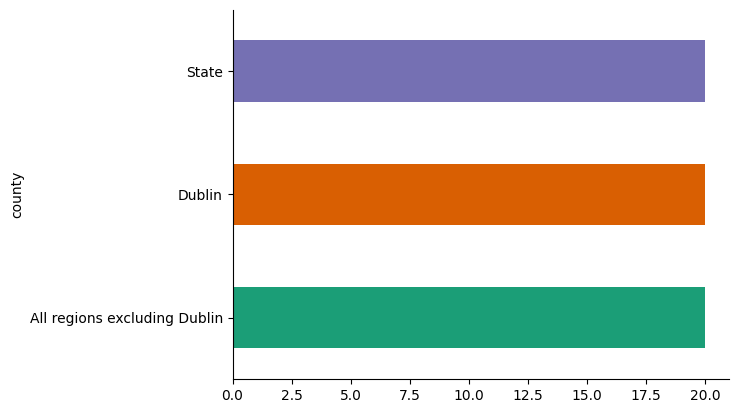

In [207]:
#Ownership by county

from matplotlib import pyplot as plt
import seaborn as sns
ev_ownership_aggregated.groupby('county').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [211]:
#Working with the population data

population_irl.head(2)

# Filter data to only include relevant columns and rows (e.g., total population for each county and year)
population_filtered = population_irl[(population_irl['population'] == 'Population at Each Census') &
                                     (population_irl['sex'] == 'Both sexes')]


,county,sex,population
2025,State,Both sexes,5149139
2026,State,Male,2544549
